### Package Preparation 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
color = sns.color_palette()
%matplotlib inline

### Data Preparation

In [4]:
data = pd.read_csv('Iris.csv')

In [5]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data = data.drop(['Id','Species'], axis = 1)

In [8]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Elbow plot

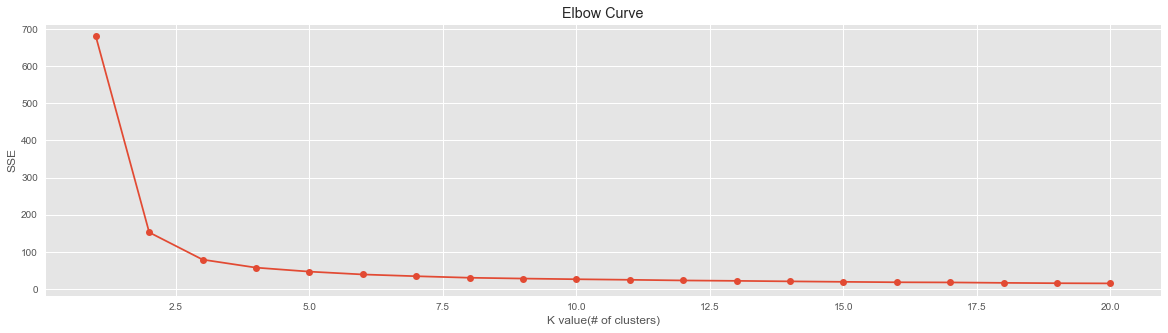

In [12]:
from sklearn.cluster import KMeans

# create a list to store elbows 
elbows = []

# use k-means++ to get the local (1~21) best k value
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    elbows.append(kmeans.inertia_)
    
# make a plot to show elbows and get the best k value 
plt.figure(figsize=(20,5))
plt.plot(range(1, 21), elbows, marker='o')
plt.xlabel('K value(# of clusters)')
plt.ylabel('SSE') 
plt.title('Elbow Curve')
plt.show()

# according to the plot, 2 or 3 is the best k value, we select 3 as # of clusters.

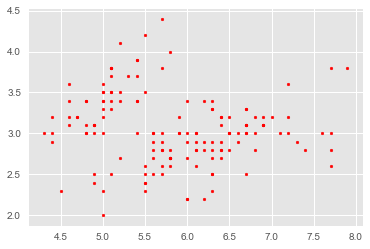

In [15]:
# build kmeans model and show data point
clu = data[['SepalLengthCm','SepalWidthCm']].copy()
clu = clu.values
plt.scatter(clu[:, 0], clu[:, 1], c='red', s=7)

In [19]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = pd.DataFrame(model.fit_predict(clu))
y_kfit = model.fit_predict(clu)

In [23]:
# Merge clusters for final clustered data frame
sepal_length_1 = clu[y_kfit == 0, 0]
sepal_width_1 = clu[y_kfit == 0, 1]
cluster_1 = pd.DataFrame({'SepalLengthCm':sepal_length_1, 'SepalWidthCm':sepal_width_1, 'cluster':1})

sepal_length_2 = clu[y_kfit == 1, 0]
sepal_width_2 = clu[y_kfit == 1, 1]
cluster_2 = pd.DataFrame({'SepalLengthCm':sepal_length_2, 'SepalWidthCm':sepal_width_2, 'cluster':2})

sepal_length_3 = clu[y_kfit == 2, 0]
sepal_width_3 = clu[y_kfit == 2, 1]
cluster_3 = pd.DataFrame({'SepalLengthCm':sepal_length_3, 'SepalWidthCm':sepal_width_3, 'cluster':3})

cluster_final = pd.concat([cluster_1, cluster_2, cluster_3], axis=0)

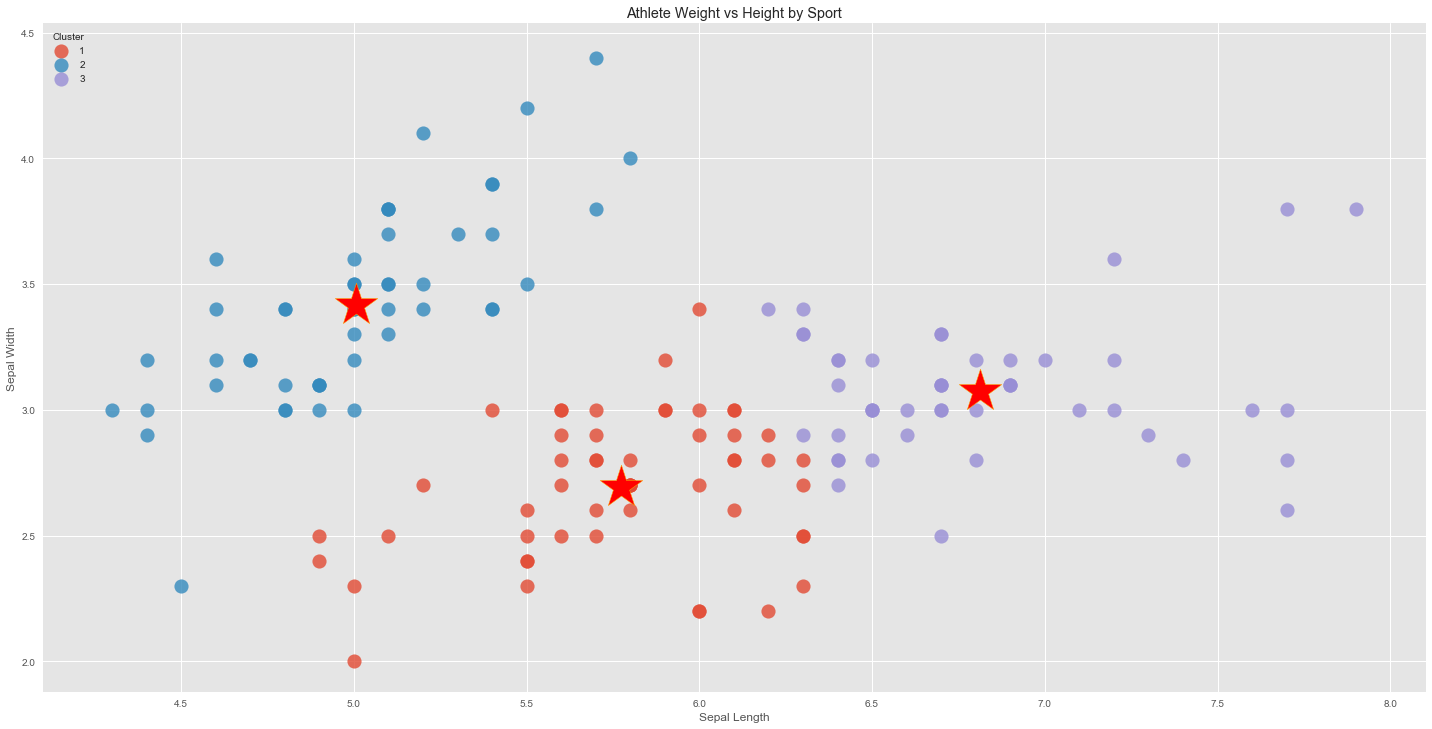

In [22]:
dx = sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=cluster_final, hue='cluster', fit_reg=False, size=10, aspect=2, legend=False, scatter_kws={"s": 200})
dx.set(xlabel='Sepal Length', ylabel='Sepal Width', title="Athlete Weight vs Height by Sport")
plt.legend(loc='upper left', title='Cluster')

# show centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=2000, marker='*',
    c='red', edgecolor='orange',
    label='centroids')
plt.show()